In [1]:
import pandas as pd

In [2]:
sub0 = pd.read_csv('fold0/submission.csv', index_col='recording_id')
sub1 = pd.read_csv('fold1/submission.csv', index_col='recording_id')
sub2 = pd.read_csv('fold2/submission.csv', index_col='recording_id')
sub3 = pd.read_csv('fold3/submission.csv', index_col='recording_id')

In [71]:
def transform(pred):
    index = pred.index
    columns = pred.columns
    pred = pred.values
    pred = (pred-pred.min(axis=1, keepdims=True))/(pred.max(axis=1, keepdims=True)-pred.min(axis=1, keepdims=True))
    pred = np.array([(one[:, np.newaxis] - one).mean(axis=1) for one in pred])
    return pd.DataFrame(pred, index=index, columns=columns)

In [72]:
sub = transform(sub0)+transform(sub1)+transform(sub2)+(transform(sub3)*0.9)

In [73]:
sub.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
recording_id,,,,,,,,,,,,,,,,,,,,,
000316da7,1.767467,-0.833195,-1.053868,2.490255,-1.111176,0.472842,-1.037326,-0.843029,-0.496346,-0.082053,...,-0.222522,0.189028,0.163863,-0.857635,2.379530,-0.822806,0.051115,-0.243812,-0.042752,0.408336
003bc2cb2,0.280533,-0.307909,-1.084850,1.810393,-0.974000,-0.068143,-0.882866,-0.837873,0.054758,-0.253029,...,-0.093142,-0.300801,2.712573,-0.374561,0.415407,-0.452041,0.064197,0.501112,0.193462,-0.239080
0061c037e,0.100195,-1.059398,-0.381450,0.277912,-1.109252,0.035652,-0.895453,1.082136,-0.654406,-0.196039,...,-1.048091,0.072846,1.053404,0.636885,0.215150,-0.298454,1.077423,-0.607843,-0.897974,0.296473
010eb14d3,1.831430,-0.634416,-1.142439,1.481059,-0.544960,-0.716149,-1.180434,-0.459821,2.606768,-0.474368,...,0.060965,-0.784549,1.057288,-1.164965,1.627471,-0.851370,-0.387727,0.424070,-0.505262,-0.178077
011318064,-0.309241,-0.633497,-0.207662,1.993195,0.250595,-0.583662,-0.595802,-1.129236,-0.226011,-0.608161,...,2.626464,2.117464,0.203376,-1.085659,1.546889,-0.825247,-0.382821,1.379715,-0.455084,-0.441407


In [65]:
sub = sub0.rank(axis=1)+sub1.rank(axis=1)+sub2.rank(axis=1)+(sub3.rank(axis=1)*0.9)

In [66]:
sub.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
recording_id,,,,,,,,,,,,,,,,,,,,,
000316da7,83.9,19.6,21.2,92.6,14.8,71.1,16.5,22.4,40.1,64.0,...,49.8,63.4,57.5,31.0,87.8,31.3,53.7,45.9,54.6,71.3
003bc2cb2,68.2,43.0,9.6,89.7,10.9,44.6,16.5,12.8,53.9,47.8,...,55.3,37.4,93.6,39.7,69.4,28.7,59.5,79.8,68.9,41.1
0061c037e,56.6,10.7,40.1,65.1,10.9,45.2,28.0,81.7,17.8,47.7,...,12.6,58.5,83.8,77.0,49.3,43.9,82.9,35.8,18.5,65.3
010eb14d3,87.7,34.3,10.6,84.8,36.4,32.1,7.9,42.5,93.6,41.7,...,61.4,32.2,75.1,10.7,83.9,26.5,46.9,69.2,44.8,52.6
011318064,48.8,34.1,63.2,85.8,71.1,26.4,30.3,4.9,59.5,41.7,...,93.6,89.7,70.3,9.7,80.9,24.5,43.0,79.0,48.4,42.2


In [16]:
sub = sub0+((sub1+sub2+(sub3*0.9))*0.1)

In [19]:
sub.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
recording_id,,,,,,,,,,,,,,,,,,,,,
000316da7,1.660903,-4.772161,-5.697456,4.100210,-5.416010,-1.382003,-5.823643,-5.586879,-3.665202,-3.658275,...,-2.560374,-3.200218,-2.256868,-5.221573,4.368233,-5.128731,-3.634385,-4.034012,-2.229968,-1.334804
003bc2cb2,-0.989103,-1.630188,-5.831992,3.912870,-5.132301,-2.773670,-4.998097,-5.037341,0.448162,-2.726018,...,-2.717524,-3.636745,5.725534,-2.842974,0.391284,-3.787536,-2.509538,-1.306720,-1.997112,-2.860620
0061c037e,-1.163878,-4.337473,-3.760795,-0.057653,-4.002130,-1.640763,-4.417159,-0.216748,-2.885711,-2.047717,...,-4.673653,-1.763169,0.596697,-0.178962,-0.045714,-2.599554,0.276782,-4.324962,-3.971927,-1.622841
010eb14d3,5.101719,-3.903065,-5.832843,4.959814,-3.455165,-4.041803,-5.832392,-4.219280,8.406879,-4.463007,...,-1.019660,-5.418061,2.450244,-6.295576,4.930951,-4.584443,-3.475687,-0.104181,-2.921114,-3.423384
011318064,-2.102499,-4.346549,-2.100328,4.694761,-1.296905,-3.419421,-3.540201,-5.733563,-2.091038,-3.782460,...,6.333567,4.947576,-0.856197,-5.215628,2.948724,-4.553915,-3.775524,2.297358,-2.743838,-3.071524


In [20]:
sub.to_csv('submission.csv')

In [12]:
sub0.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-0.620437,-1.467482,-3.043097,3.008312,-2.835296,-1.214615,-3.671607,-1.899620,-2.013848,-1.797837,...,-1.782711,-1.403369,0.383717,-2.936641,1.582138,-2.655299,-2.383356,-1.917457,-1.804230,-0.969432
std,2.011938,2.604360,2.158024,1.458025,1.721694,1.783416,1.428394,3.133277,2.424710,1.782127,...,2.602774,2.848029,1.443965,1.753866,2.277560,1.593293,1.969730,1.726073,1.474915,1.940738
min,-3.857699,-4.842347,-5.492940,-3.577313,-5.458488,-4.217406,-5.513711,-5.849620,-5.860695,-4.487135,...,-4.816571,-4.859696,-2.506686,-5.351390,-3.061111,-4.728741,-5.279735,-4.627769,-4.667395,-5.002142
25%,-1.858272,-3.338778,-4.369727,2.544281,-3.957085,-2.514345,-4.592639,-4.644194,-3.690185,-3.137052,...,-3.527997,-3.582923,-0.587993,-4.218265,-0.518687,-3.773667,-4.155337,-3.244791,-2.562944,-2.255740
50%,-1.032114,-2.395967,-3.690767,3.324731,-3.193095,-1.644169,-4.189153,-3.086107,-2.697816,-2.105978,...,-2.620730,-2.596437,0.181815,-3.335636,1.438474,-3.132556,-2.722134,-2.230287,-2.088148,-1.385236
75%,-0.192675,-0.487464,-2.643467,3.956451,-2.341361,-0.273462,-3.237676,0.600739,-1.033666,-0.958168,...,-1.157148,0.486330,1.022520,-2.099135,3.718020,-2.027903,-0.887088,-0.891280,-1.647894,-0.205499
max,5.693092,5.363260,5.653453,5.374399,6.650035,4.648795,5.931424,4.997822,6.683434,5.294226,...,6.205765,5.067760,5.498474,5.287790,6.041593,5.615910,5.818071,6.233127,6.325148,5.942801


In [13]:
sub1.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-0.838728,-1.452622,-2.542897,2.348569,-2.787377,-1.682069,-3.206687,-0.919170,-2.843161,-0.966290,...,-1.681142,0.226427,0.253834,-2.738452,0.456923,-1.652047,-0.756001,-0.387419,-2.388771,0.086668
std,2.224194,2.949494,2.020349,1.819730,1.756942,1.890451,1.323955,3.185742,2.185529,1.615914,...,2.652479,1.909540,1.378035,1.572950,2.478922,1.358705,1.794411,1.535704,1.644251,1.684369
min,-4.195526,-5.108147,-4.904816,-5.049946,-5.073950,-4.640948,-5.057800,-4.889525,-5.917560,-3.822984,...,-4.791382,-3.114961,-2.429033,-4.968888,-3.667083,-3.786124,-4.347385,-3.552056,-5.020659,-4.175385
25%,-2.231125,-3.756748,-3.690030,1.948940,-3.822096,-3.022296,-4.089026,-3.759707,-4.104416,-2.125740,...,-3.423090,-1.179617,-0.621248,-3.800845,-1.898424,-2.621408,-2.259513,-1.531628,-3.231005,-1.149865
50%,-1.391783,-2.453564,-3.135028,2.893092,-3.234364,-2.218671,-3.608269,-1.990133,-3.479777,-1.175991,...,-2.565591,-0.265751,-0.016388,-3.234138,0.063188,-2.001875,-0.810288,-0.373068,-2.758351,-0.105695
75%,-0.284885,-0.126064,-2.269200,3.481114,-2.386269,-0.949696,-2.712026,1.983879,-2.430795,-0.188880,...,-1.166254,1.064646,0.831362,-2.050621,2.880541,-1.035757,0.544954,0.481577,-2.337465,0.984767
max,6.029742,6.120095,6.122067,5.090280,6.866317,4.862731,6.100233,5.665686,6.521048,5.376221,...,6.310266,5.220913,5.415368,4.501347,6.077807,6.234642,5.648311,6.502468,6.691588,5.158319


In [14]:
sub2.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-0.309193,-1.477924,-1.929680,2.802053,-2.916884,-1.723194,-2.629023,-1.090761,-3.168919,-0.931609,...,-1.284406,-1.018797,0.348242,-1.656242,0.482122,-2.802025,-1.610513,-0.898225,-1.471920,-0.708490
std,1.798869,2.720377,1.950829,1.510232,1.891669,1.774955,1.703517,3.177441,2.301873,1.573574,...,2.531273,2.470322,1.417203,1.608541,2.617458,1.289687,2.038547,1.445033,1.514505,1.786793
min,-3.789793,-4.908397,-4.655724,-3.546101,-5.326176,-4.693510,-5.317204,-5.910160,-5.825462,-4.701000,...,-4.700995,-4.201879,-2.497585,-4.842897,-4.319306,-4.776869,-5.020296,-3.693012,-4.564837,-4.643683
25%,-1.496732,-3.421410,-3.041412,2.328278,-4.164832,-2.978211,-3.892945,-4.048640,-4.369624,-1.886062,...,-2.942697,-3.048354,-0.598167,-2.913862,-1.973127,-3.662567,-3.386246,-1.880216,-2.361614,-1.935863
50%,-0.617248,-2.525358,-2.514915,3.154797,-3.449438,-2.214368,-3.050804,-1.814136,-3.846588,-1.192132,...,-2.033242,-1.825782,0.104469,-1.782775,0.196467,-3.157436,-1.737293,-1.081693,-1.775761,-1.042900
75%,0.372260,-0.469019,-1.599189,3.785841,-2.409139,-1.053457,-1.780404,1.748377,-2.984817,-0.232862,...,-0.546174,0.410178,1.080452,-0.685279,2.937038,-2.335969,-0.173945,-0.208311,-1.110209,0.109731
max,5.517938,5.545815,5.967740,5.471157,6.425853,4.443537,5.646613,5.029516,6.963646,5.233212,...,6.419776,5.008695,5.187459,4.574905,5.822900,6.010466,5.578758,6.365060,5.981637,5.262039


In [15]:
sub3.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-0.767740,-1.391146,-2.550192,1.365166,-2.615561,-1.005030,-3.036738,-0.554837,-2.704192,-1.890929,...,-1.979758,-0.865069,0.331058,-2.298657,0.324188,-2.872730,-1.670271,-1.854544,-2.148839,-1.545129
std,1.531959,1.937859,1.950954,1.284435,1.473503,1.707156,1.094524,2.348025,2.104609,1.254870,...,2.364239,2.323323,1.656778,1.482677,1.858696,1.275772,1.476434,1.348212,1.461957,1.864467
min,-2.844253,-4.060369,-4.601128,-2.826756,-4.904605,-4.256783,-4.849496,-3.849571,-5.364983,-3.936545,...,-4.714328,-3.951407,-2.013278,-4.616709,-3.136239,-4.572966,-4.260833,-3.598121,-3.636852,-4.153552
25%,-1.697236,-2.732323,-3.520167,0.875966,-3.463624,-2.128468,-3.729924,-2.481734,-3.790833,-2.601064,...,-3.411400,-2.708455,-0.671426,-3.250459,-1.301691,-3.560952,-2.796903,-2.602280,-2.784827,-2.619225
50%,-1.194386,-2.028243,-3.080631,1.635990,-2.937555,-1.480452,-3.247005,-1.305828,-3.225507,-2.196302,...,-2.732906,-1.547208,-0.131957,-2.568711,0.181013,-3.236557,-1.812870,-2.089456,-2.526101,-2.023109
75%,-0.516532,-0.809725,-2.478050,2.208879,-2.233517,-0.424327,-2.606760,1.020230,-2.459915,-1.586346,...,-1.674151,0.103403,0.723890,-1.723175,1.873333,-2.624304,-0.871709,-1.547803,-2.137337,-1.240326
max,5.569580,5.234268,6.864762,3.932287,7.167108,5.371380,6.785908,5.643431,6.732157,5.920453,...,6.699469,5.901893,7.109668,7.317718,5.932892,8.236203,7.782228,7.452845,7.195759,6.788250


In [8]:
sub0.T.corrwith(sub1.T).mean()

0.889965424244505

In [9]:
sub0.T.corrwith(sub2.T).mean()

0.9082926824552703

In [11]:
sub0.T.corrwith(sub3.T).mean()

0.8934867880133756

In [17]:
sub0.std(axis=1).mean()

0.3328804775003335

In [18]:
sub1.std(axis=1).mean()

0.3356505878929697

In [19]:
sub2.std(axis=1).mean()

0.33100524084207816

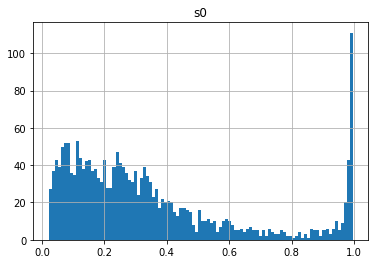

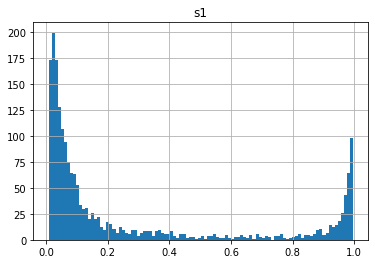

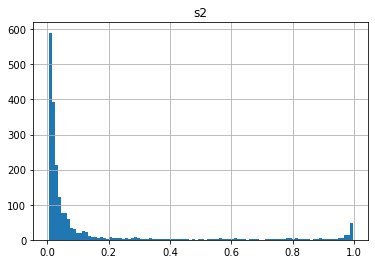

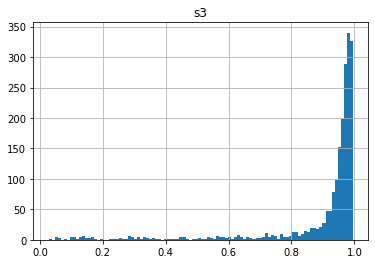

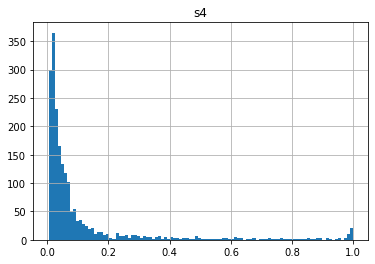

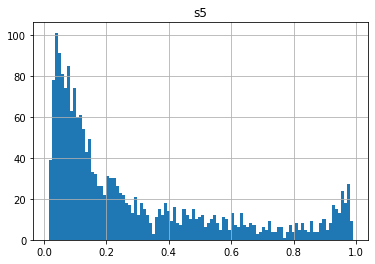

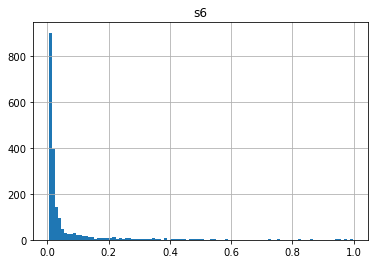

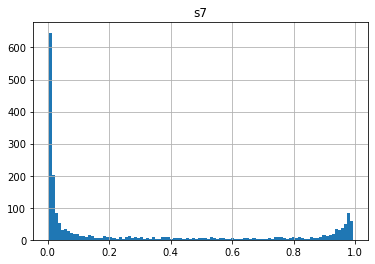

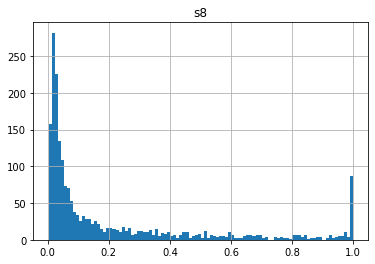

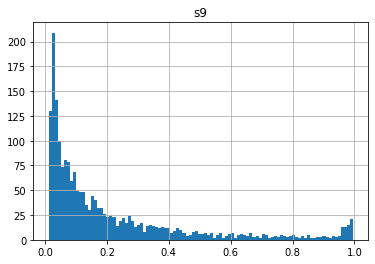

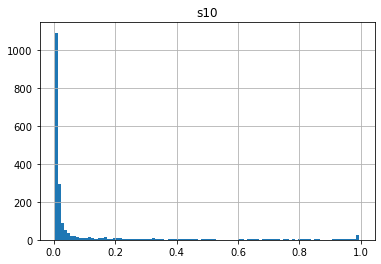

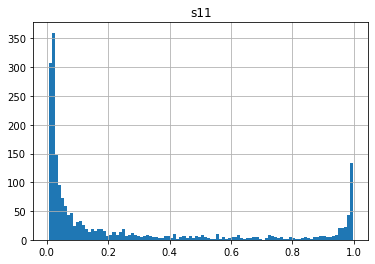

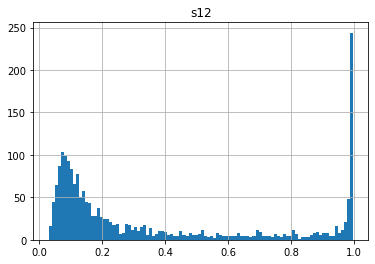

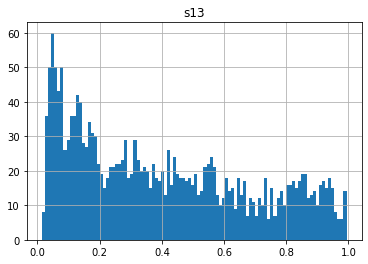

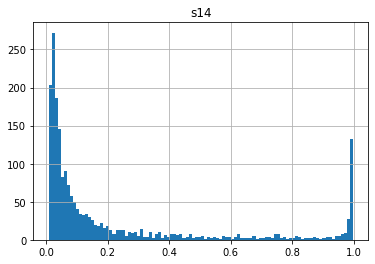

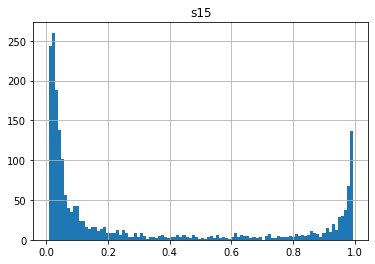

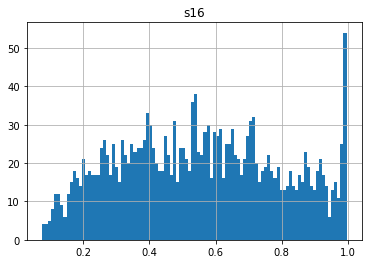

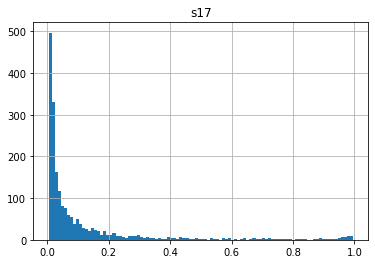

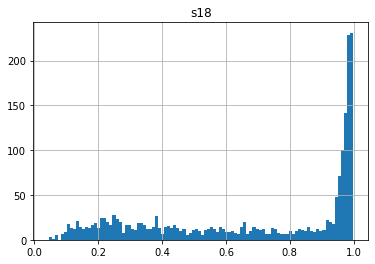

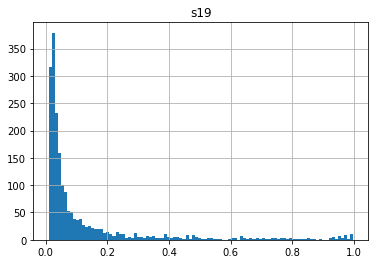

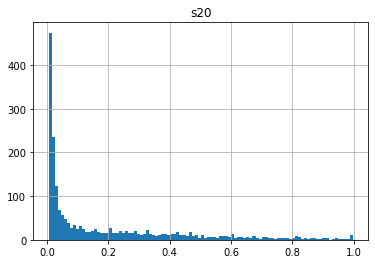

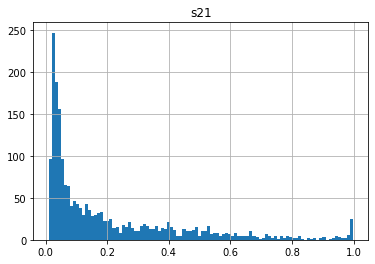

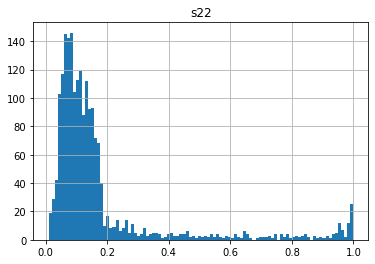

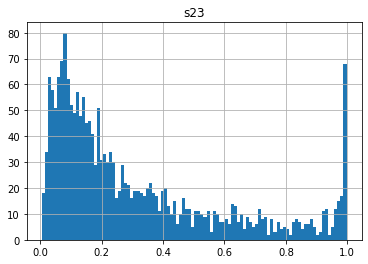

In [23]:
import matplotlib.pyplot as plt
for c in sub1.columns:
    sub0[c].hist(bins=100)
    plt.title(c)
    plt.show()